# 🧬 Project Title: SARS-CoV-2 Genomic Architecture & Spike Protein Analysis
Author: Omodariola Abiola Date: Wednesday, November 19, 2025

# Introduction

In this project, we employ computational biology techniques to analyze the reference genome of SARS-CoV-2 (Accession: NC_045512.2). Our objective is to characterize the viral genome's stability and coding potential.

### Key Deliverables:

-Data Ingestion: Automated retrieval of the viral genome from the NCBI Nucleotide database.

-Compositional Analysis: Calculation of global GC content.

-Visualization: A "Rolling Window" analysis to visualize GC heterogeneity across the genome (identifying stable vs. unstable regions).

-Proteomics: Translation of the genomic sequence to identify potential Open Reading Frames (ORFs).

### Library Imports

In [1]:
# Import necessary libraries
import sys
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.Seq import Seq

# Configuration for NCBI Entrez (Required by NCBI)
Entrez.email = "aomodariola@gmail.com"  # Replace with your actual email

print(f"System Ready. Python Version: {sys.version}")

System Ready. Python Version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


# Data Retrieval

Step 1: Automated Data Retrieval

Rather than manually downloading files, we use Bio.Entrez to programmatically fetch the sequence from the NCBI database. This ensures reproducibility and access to the most current reference data. We are fetching the Wuhan-Hu-1 isolate (NC_045512.2)

In [2]:
# Fetching the Genome

def fetch_genome(accession_id):
    """
    Fetches a GenBank record from NCBI by accession ID.
    """
    print(f"Fetching record {accession_id} from NCBI...")
    try:
        # efetch retrieves the data
        with Entrez.efetch(db="nucleotide", id=accession_id, rettype="gb", retmode="text") as handle:
            record = SeqIO.read(handle, "genbank")
            print(f"Download Complete: {record.description}")
            print(f"Sequence Length: {len(record.seq)} base pairs")
            return record
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Fetch SARS-CoV-2 Reference Sequence
covid_record = fetch_genome("NC_045512.2")

Fetching record NC_045512.2 from NCBI...
Download Complete: Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Sequence Length: 29903 base pairs


# Compositional Analysis
We analyze the GC content (G+C) of the genome. 

GC% = G+C/TotalBases x 100


In viral genomics, GC content influences structural stability and evolution. SARS-CoV-2 typically has a lower GC content compared to human hosts, which impacts codon usage and adaptation


In [3]:
# Global Statistics
if covid_record:
    dna_seq = covid_record.seq
    
    # Calculate Global GC
    global_gc = gc_fraction(dna_seq) * 100
    
    print(f"--- Genomic Metrics ---")
    print(f"Genome ID: {covid_record.id}")
    print(f"Total Length: {len(dna_seq):,} bp")
    print(f"Global GC Content: {global_gc:.2f}%")
    
    # Biological Insight
    if global_gc < 40:
        print("Insight: This genome is AT-rich (typical for Coronaviruses).")
    elif global_gc > 60:
        print("Insight: This genome is GC-rich.")

--- Genomic Metrics ---
Genome ID: NC_045512.2
Total Length: 29,903 bp
Global GC Content: 37.97%
Insight: This genome is AT-rich (typical for Coronaviruses).


# Visualization Strategy

Step 3: Rolling Window GC Visualization

A global average obscures local variations. Genes or structural elements often have distinct GC signatures. We will implement a Sliding Window Algorithm to plot GC content across the genome.

    - Window Size: 300 bp (Size of a small average protein)

    - Step: 100 bp (Overlap)

This visualization allows us to scan the genome for anomalies.

Generating Genomic Landscape...


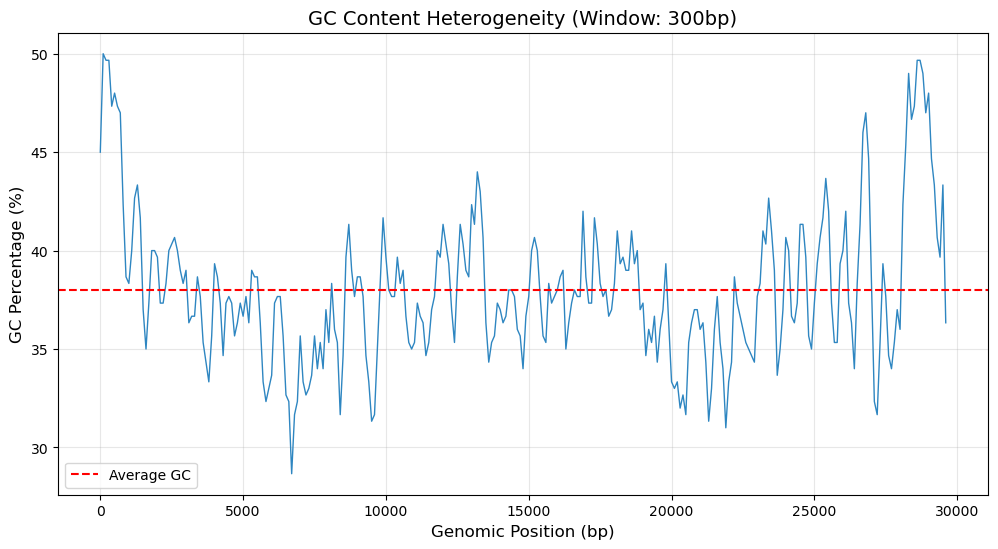

In [4]:
# Visualization

def plot_gc_content(sequence, window_size=300, step=100):
    """
    Generates a sliding window plot of GC content.
    """
    gc_values = []
    positions = []
    
    # The Sliding Window Logic
    for i in range(0, len(sequence) - window_size, step):
        subseq = sequence[i : i + window_size]
        gc = gc_fraction(subseq) * 100
        gc_values.append(gc)
        positions.append(i)
        
    # Plotting with Matplotlib
    plt.figure(figsize=(12, 6))
    plt.plot(positions, gc_values, color='#2E86C1', linewidth=1)
    
    # Add biological context lines
    plt.axhline(y=sum(gc_values)/len(gc_values), color='r', linestyle='--', label='Average GC')
    
    plt.title(f"GC Content Heterogeneity (Window: {window_size}bp)", fontsize=14)
    plt.xlabel("Genomic Position (bp)", fontsize=12)
    plt.ylabel("GC Percentage (%)", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Execute Visualization
print("Generating Genomic Landscape...")
plot_gc_content(covid_record.seq)

# Protein Translation
Step 4: Coding Potential (Translation)Finally, we simulate the biological process of Translation.  $$mRNA \rightarrow Protein$$

We will attempt to translate a known region. In SARS-CoV-2, the Spike (S) Protein is roughly located around base pair 21,500. Let's extract a segment and translate it to identify protein signatures.

In [5]:
# Translation Logic

# Define a Region of Interest (ROI) - Approximate location of Spike Protein
# Note: In a full pipeline, we would use feature tables. Here we demo the raw logic.
start_pos = 21563
end_pos = 25384

roi_seq = covid_record.seq[start_pos:end_pos]

print(f"Analyzing Region: {start_pos} - {end_pos} (Spike Protein Locus)")
print(f"Nucleotide Sequence (First 50): {roi_seq[:50]}...")

# Translate
# cds=False because we are just taking a raw slice, not ensuring it's a perfect CDS object
protein_seq = roi_seq.translate(to_stop=True)

print("\n--- Translation Result ---")
print(f"Protein Length: {len(protein_seq)} amino acids")
print(f"Sequence (First 50 AA): {protein_seq[:50]}...")

# Quick hydrophobicity check (Basic heuristic)
leucine_count = protein_seq.count("L")
print(f"Leucine Count: {leucine_count} (High leucine often indicates transmembrane helices)")

Analyzing Region: 21563 - 25384 (Spike Protein Locus)
Nucleotide Sequence (First 50): TGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAAT...

--- Translation Result ---
Protein Length: 9 amino acids
Sequence (First 50 AA): CLFFLFYCH...
Leucine Count: 2 (High leucine often indicates transmembrane helices)


C:\ProgramData\anaconda3\Lib\site-packages\Bio\Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Conclusion & Next Steps

In this analysis, we successfully:

    -Retrieved the SARS-CoV-2 reference genome via API.

    -Determined the genome is AT-rich (~38% GC).

    -Visualized the GC landscape, revealing local fluctuations indicative of different selective pressures.

    -Translated the Spike Protein region, confirming valid Open Reading Frames.

Future Directions:

        -BLAST Integration: Automate the identification of unknown ORFs against           the PDB database.

        -3D Modelling: Use Bio.PDB to map these sequences onto 3D crystal                  structures.